## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Sample 1

In [2]:
# Create df
df = pd.DataFrame({'id': np.arange(1,51),
                  'val': np.random.randn(50)})
df.head()

# Sample 1 mean
df.val.mean()

0.05470278117349658

### Sample 2

In [3]:
# Create df2
df2 = pd.DataFrame({'id': np.arange(1,31),
                   'val': np.random.randint(40,50, size=30)/10})
df2.val.mean()

4.430000000000001

### Test Sample 1 vs Sample 2

In [8]:
# Significancy level (alfa)
'''If the probability value (p-value) is lower than this number, 
then we can't say statistically that both samples come from the same population'''
alfa = 0.05

In [15]:
# Test Sample 1 vs Sample 2
sample1 = df.val
mean_sample2 = df2.val.mean()

stat, p = ztest(sample1, value=mean_sample2)
print(f'Test statistics: {stat}')
print(f'p-Value: {p}')
print(f'Ho rejected. Assume different population.' if p < alfa else 'Ho not rejected. Assume same population.')


Test statistics: -29.069698615811596
p-Value: 8.675221904016979e-186
Ho rejected. Assume different population.


## Sample 3

In [5]:
"Create a sample 3 out of the sample 1. It is expected that the p-value will be higher than 5%"
# Create df3
df3 = pd.DataFrame({'id': np.arange(1,31),
                   'val': np.random.choice(df['val'].values, size=30)})

# Mean sample 3
df3.val.mean()

0.04887366631836466

### Test Sample 1 vs Sample 3

In [14]:
# Test Sample 1 vs Sample 3
sample1 = df.val
mean_sample3 = df3.val.mean()

stat, p = ztest(sample1, value=mean_sample3)
print(f'Test statistics: {stat}')
print(f'p-Value: {p}')
print(f'Ho rejected. Assume different population.' if p < alfa else 'Ho not rejected. Assume same population.')

Test statistics: 0.03872893738658596
p-Value: 0.9691065020130489
Ho not rejected. Assume same population.


### Plot 

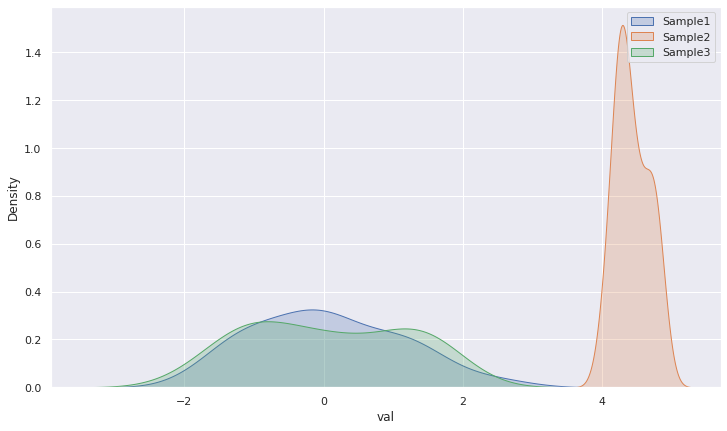

In [7]:
# Plot the 3 samples distributions
plt.figure(figsize=(12,7))
g= sns.kdeplot(data=df, x='val', fill=True)
g= sns.kdeplot(data=df2, x='val', fill=True)
g= sns.kdeplot(data=df3, x='val', fill=True)
plt.legend(['Sample1', 'Sample2', 'Sample3'])